<a href="https://colab.research.google.com/github/rcosse-Teo/Calculo_Simulacao/blob/main/HalphinTsai_NewtonRaphson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Método de Newton-Raphson para Compósitos ---
Alvo: Encontrar Vf para E2 = 15.0 GPa
Chute inicial: 30% (0.3)

Iter  | Vf Atual   | E2 Calc (GPa)   | Erro      
-------------------------------------------------------
0     | 0.300000    | 7.7205          | -7.28e+00
1     | 0.669085    | 22.1215          | 7.12e+00
2     | 0.576825    | 16.3993          | 1.40e+00
3     | 0.548746    | 15.0790          | 7.90e-02
4     | 0.546966    | 15.0003          | 2.81e-04
5     | 0.546960    | 15.0000          | 3.60e-09
-------------------------------------------------------
RESULTADO: Vf Necessário = 54.6960%
Note como convergiu rápido (poucas iterações)!


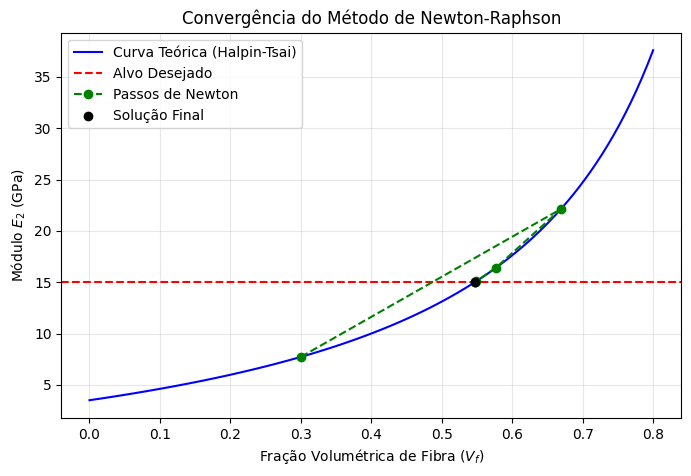

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. A FÍSICA (Halpin-Tsai e sua Derivada) ---

def calcular_halpin_tsai(Vf, Em, Ef, xi):
    """Calcula o valor de E2 (Módulo Transversal)"""
    eta = ((Ef / Em) - 1) / ((Ef / Em) + xi)
    # Evita divisão por zero se Vf for muito alto no chute
    if Vf * eta >= 1.0: return float('inf')

    E2 = Em * (1 + xi * eta * Vf) / (1 - eta * Vf)
    return E2

def calcular_derivada(Vf, Em, Ef, xi):
    """
    Calcula a DERIVADA analítica dE2/dVf.
    É aqui que a mágica do Newton-Raphson acontece.
    """
    eta = ((Ef / Em) - 1) / ((Ef / Em) + xi)

    # Fórmula derivada da regra do quociente
    numerador = Em * eta * (1 + xi)
    denominador = (1 - eta * Vf)**2

    return numerador / denominador

# --- 2. O MÉTODO DE NEWTON-RAPHSON ---

def newton_raphson(Em, Ef, xi, E_alvo, x0, tol=1e-5, max_iter=20):
    """
    x0: Chute inicial (ex: 0.5 para 50%)
    tol: Tolerância do erro
    """
    x_atual = x0

    print(f"{'Iter':<5} | {'Vf Atual':<10} | {'E2 Calc (GPa)':<15} | {'Erro':<10}")
    print("-" * 55)

    historico_x = [x0] # Para plotar depois

    for i in range(max_iter):
        # 1. Calcula o valor da função (Erro)
        E_calc = calcular_halpin_tsai(x_atual, Em, Ef, xi)
        funcao_erro = E_calc - E_alvo

        # 2. Calcula a derivada naquele ponto (Inclinação da tangente)
        derivada = calcular_derivada(x_atual, Em, Ef, xi)

        print(f"{i:<5} | {x_atual:.6f}    | {E_calc:.4f}          | {funcao_erro:.2e}")

        # 3. Verifica convergência
        if abs(funcao_erro) < tol:
            return x_atual, historico_x

        # 4. Passo de Newton: x_novo = x_velho - f(x)/f'(x)
        if derivada == 0:
            print("Erro: Derivada zero. O método falhou.")
            return None, historico_x

        x_proximo = x_atual - (funcao_erro / derivada)

        # Segurança: Impede que o Vf vá para valores absurdos (ex: negativo)
        if x_proximo < 0: x_proximo = 0.001
        if x_proximo > 0.95: x_proximo = 0.95

        x_atual = x_proximo
        historico_x.append(x_atual)

    print("Aviso: Número máximo de iterações atingido.")
    return x_atual, historico_x

# --- 3. EXECUÇÃO ---

# Dados do Material (Ex: Carbono/Epóxi)
E_matriz = 3.5   # GPa
E_fibra = 230.0  # GPa
xi_fator = 2.0   # Fator geométrico
E_desejado = 15.0 # GPa (Nosso alvo)

print(f"--- Método de Newton-Raphson para Compósitos ---")
print(f"Alvo: Encontrar Vf para E2 = {E_desejado} GPa")
print(f"Chute inicial: 30% (0.3)\n")

# Roda o método
chute_inicial = 0.3
vf_final, historico = newton_raphson(E_matriz, E_fibra, xi_fator, E_desejado, chute_inicial)

if vf_final:
    print("-" * 55)
    print(f"RESULTADO: Vf Necessário = {vf_final*100:.4f}%")
    print(f"Note como convergiu rápido (poucas iterações)!")

# --- 4. GRÁFICO (Com a "escada" da convergência) ---
plt.figure(figsize=(8, 5))

# Plota a curva Halpin-Tsai
vx = np.linspace(0, 0.8, 100)
vy = [calcular_halpin_tsai(v, E_matriz, E_fibra, xi_fator) for v in vx]
plt.plot(vx, vy, 'b-', label='Curva Teórica (Halpin-Tsai)')

# Plota o alvo
plt.axhline(E_desejado, color='r', linestyle='--', label='Alvo Desejado')

# Plota os passos do Newton (O caminho que o algoritmo fez)
v_steps = historico
e_steps = [calcular_halpin_tsai(v, E_matriz, E_fibra, xi_fator) for v in v_steps]
plt.plot(v_steps, e_steps, 'go--', label='Passos de Newton')
plt.scatter(vf_final, E_desejado, color='black', zorder=5, label='Solução Final')

plt.xlabel('Fração Volumétrica de Fibra ($V_f$)')
plt.ylabel('Módulo $E_2$ (GPa)')
plt.title('Convergência do Método de Newton-Raphson')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

--- Iniciando Cálculo Numérico ---
Objetivo: Encontrar Vf para ter Módulo = 15.0 GPa
Iter  | a          | b          | Vf (meio)  | Erro      
-------------------------------------------------------
0     | 0.00000    | 0.90000    | 0.45000      | -3.58e+00
1     | 0.45000    | 0.90000    | 0.67500      | 7.59e+00
2     | 0.45000    | 0.67500    | 0.56250      | 7.07e-01
3     | 0.45000    | 0.56250    | 0.50625      | -1.66e+00
4     | 0.50625    | 0.56250    | 0.53438      | -5.41e-01
5     | 0.53438    | 0.56250    | 0.54844      | 6.53e-02
6     | 0.53438    | 0.54844    | 0.54141      | -2.42e-01
7     | 0.54141    | 0.54844    | 0.54492      | -8.94e-02
8     | 0.54492    | 0.54844    | 0.54668      | -1.23e-02
9     | 0.54668    | 0.54844    | 0.54756      | 2.64e-02
10    | 0.54668    | 0.54756    | 0.54712      | 7.03e-03
11    | 0.54668    | 0.54712    | 0.54690      | -2.65e-03
12    | 0.54690    | 0.54712    | 0.54701      | 2.19e-03
13    | 0.54690    | 0.54701    | 0.5469

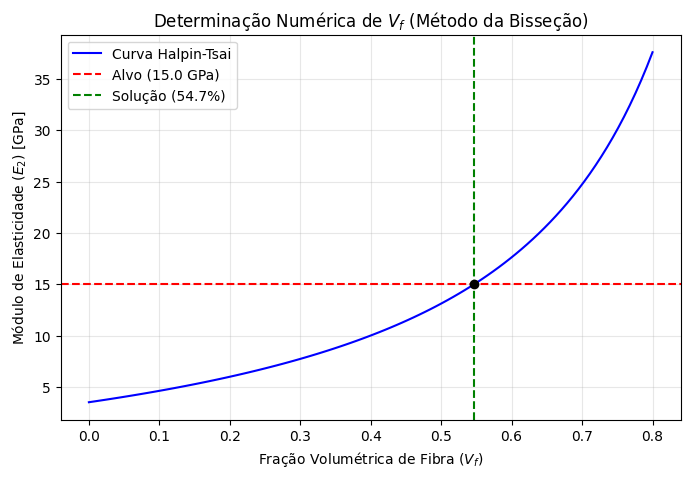

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# --- Halpin-Tsai respondida com o método da bissecção---
# --- 1. DEFINIÇÃO DA FÍSICA (HALPIN-TSAI) ---
def calcular_halpin_tsai(Vf, Em, Ef, xi):
    """
    Calcula o Módulo E2 usando Halpin-Tsai.
    Vf: Fração volumétrica de fibra (0 a 1)
    Em: Módulo da matriz
    Ef: Módulo da fibra
    xi: Fator de forma
    """
    # Evita divisão por zero ou valores impossíveis
    if Vf >= 1.0: return Ef

    eta = ((Ef / Em) - 1) / ((Ef / Em) + xi)
    E2 = Em * (1 + xi * eta * Vf) / (1 - eta * Vf)
    return E2

# --- 2. DEFINIÇÃO DA FUNÇÃO OBJETIVO (O ERRO) ---
def funcao_erro(Vf, Em, Ef, xi, E_alvo):
    """
    Retorna a diferença entre o calculado e o alvo.
    Queremos encontrar o Vf onde isso seja ZERO.
    """
    E_calculado = calcular_halpin_tsai(Vf, Em, Ef, xi)
    return E_calculado - E_alvo

# --- 3. MÉTODO NUMÉRICO: BISSEÇÃO ---
def metodo_bissecao(Em, Ef, xi, E_alvo, tol=1e-5, max_iter=100):
    # Intervalo inicial: sabemos que Vf está entre 0 (0%) e 0.9 (90%)
    a = 0.0
    b = 0.9

    # Verifica se o alvo é possível dentro desse intervalo
    erro_a = funcao_erro(a, Em, Ef, xi, E_alvo)
    erro_b = funcao_erro(b, Em, Ef, xi, E_alvo)

    if erro_a * erro_b > 0:
        print("Erro: O valor alvo é impossível de atingir com esses materiais.")
        return None

    print(f"{'Iter':<5} | {'a':<10} | {'b':<10} | {'Vf (meio)':<10} | {'Erro':<10}")
    print("-" * 55)

    # Loop do método numérico
    for i in range(max_iter):
        c = (a + b) / 2.0 # Ponto médio
        erro_c = funcao_erro(c, Em, Ef, xi, E_alvo)

        # Mostra o progresso (legal para o relatório)
        print(f"{i:<5} | {a:.5f}    | {b:.5f}    | {c:.5f}      | {erro_c:.2e}")

        # Verifica se achamos a raiz (erro muito pequeno)
        if abs(erro_c) < tol:
            return c

        # Decide qual lado cortar (Lógica da Bisseção)
        if funcao_erro(a, Em, Ef, xi, E_alvo) * erro_c < 0:
            b = c # A raiz está na esquerda
        else:
            a = c # A raiz está na direita

    return c # Retorna a melhor estimativa após max_iter

# --- 4. EXECUÇÃO DO PROBLEMA ---

# Propriedades do Material (Exemplo: Fibra de Vidro / Epóxi)
E_matriz = 3.5  # GPa
E_fibra = 230  # GPa
xi_fator = 2.0  # Fator geométrico (circular)
E_desejado = 15.0 # GPa (QUEREMOS DESCOBRIR O Vf PARA TER 15 GPa)

print(f"--- Iniciando Cálculo Numérico ---")
print(f"Objetivo: Encontrar Vf para ter Módulo = {E_desejado} GPa")

Vf_encontrado = metodo_bissecao(E_matriz, E_fibra, xi_fator, E_desejado)

if Vf_encontrado:
    print("-" * 55)
    print(f"RESULTADO FINAL:")
    print(f"Para obter {E_desejado} GPa, você precisa de Vf = {Vf_encontrado*100:.2f}%")

# --- 5. GERAÇÃO DE GRÁFICO (PARA O RELATÓRIO) ---
# Cria uma curva para mostrar visualmente onde a raiz está
v_x = np.linspace(0, 0.8, 100)
e_y = [calcular_halpin_tsai(v, E_matriz, E_fibra, xi_fator) for v in v_x]

plt.figure(figsize=(8, 5))
plt.plot(v_x, e_y, label='Curva Halpin-Tsai', color='blue')
plt.axhline(y=E_desejado, color='red', linestyle='--', label=f'Alvo ({E_desejado} GPa)')
plt.axvline(x=Vf_encontrado, color='green', linestyle='--', label=f'Solução ({Vf_encontrado*100:.1f}%)')
plt.scatter(Vf_encontrado, E_desejado, color='black', zorder=5)
plt.xlabel('Fração Volumétrica de Fibra ($V_f$)')
plt.ylabel('Módulo de Elasticidade ($E_2$) [GPa]')
plt.title('Determinação Numérica de $V_f$ (Método da Bisseção)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# New Section